<a href="https://colab.research.google.com/github/thual/CLAT-EkmanAtmo/blob/main/spiraleEkmanAtmosphere.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Olivier THUAL, Toulouse INP le 23/10/2021. LicenceCC BY-SA*
# Spirale d'Ekman atmosphérique
$$\left\{\begin{matrix} \displaystyle {\partial \tilde u \over \partial t} - f \tilde v = {\partial \over \partial z} \left( K {\partial \tilde u \over \partial z}\right) \cr \displaystyle {\partial\tilde v \over \partial t} + f \tilde u = {\partial \over \partial z} \left( K {\partial \tilde v \over \partial z}\right)\end{matrix} \right.$$
$$K= \nu + l^2 \sqrt{\left({\partial \tilde u \over \partial z}\right)^2+\left({\partial \tilde v \over \partial z}\right)^2}\quad \hbox{avec} \quad l(z) = { \kappa z \over 1 + \kappa z / \lambda}$$
 $\kappa = 0,41$,  $\displaystyle \lambda = 2,7 \; 10^{-4} {u_g\over f}$ et $\nu=10^{-6}$ m$^2$.s$^{-1}$

 $\tilde u(H) = \tilde v(H)=0$, $\tilde u(z_0) =-u_g$ et $\tilde v(z_0) = 0$ 


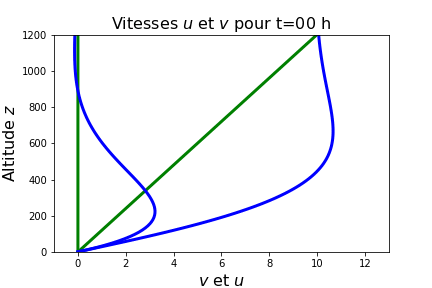

Exéctuez tout d'abord cette première partie !

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sous programmes 
def inifig(xaxe=0,yaxe=0,xlab='x',ylab='y'):
    plt.figure(2)
    plt.axvline(xaxe)
    plt.axhline(yaxe)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlab,fontsize=16 )
    plt.ylabel(ylab,fontsize=16)
    
def zfi(x,le=3):
    miss=le-len(str(x))
    a='0'*miss+str(x)
    return a  
    
def Fuv(u,v):
    dudz=(u[1:]-u[:-1])/dz
    dvdz=(v[1:]-v[:-1])/dz
    K=nu+l**2*np.sqrt(dudz**2+dvdz**2) 
    Kdudz=K*dudz; Kdvdz=K*dvdz
    Fu=f*v[1:-1]+(Kdudz[1:]-Kdudz[:-1])/dz
    Fv=-f*u[1:-1]+(Kdvdz[1:]-Kdvdz[:-1])/dz
    return Fu,Fv
    
def advance(u,v):
    ifilm=0
    for n in range(Nt):
        Fu,Fv=Fuv(u,v)
        u[1:-1]=u[1:-1]+dt*Fu
        v[1:-1]=v[1:-1]+dt*Fv
        if (n-1)%nplot==0:
            t=round(n*dt/3600)
            plt.xlabel(r'$v$ et $u$',fontsize=16 )
            plt.ylabel(r'Altitude $z$',fontsize=16)    
            plt.xlim(xmin,xmax)
            plt.ylim(0,H)          
            plt.title("Vitesses $u$ et $v$ pour t="+zfi(t,2)+" h",fontsize=16)
            plt.plot(ug+u,z,linewidth=3,color='green')
            plt.plot(v,z,linewidth=3,color='green')
            plt.plot(ug+ul,z,linewidth=3,color='blue')
            plt.plot(vl,z,linewidth=3,color='blue')
            plt.show()
            ifilm=ifilm+1
    return u,v,ifilm

Paramètres pouvant être changés : 

*  $u_g$ : vitesse au sommet
*  $H$ : Hauteur de la couche limite
*  $z_0$: longueur de rugosité
*  Nhour : nombre d'heures de simulation
*  usdt : inverse du pas de temps
*  $N_z$ : nombre de points de grille

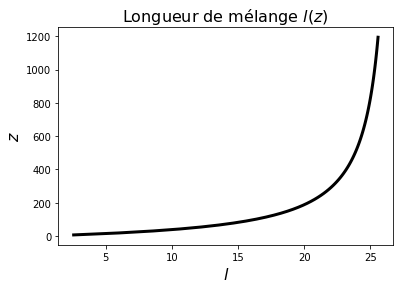

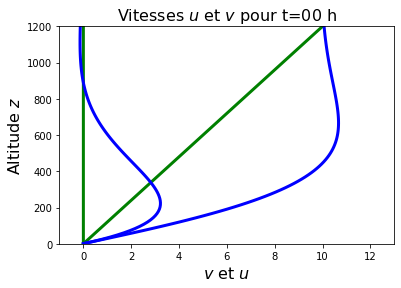

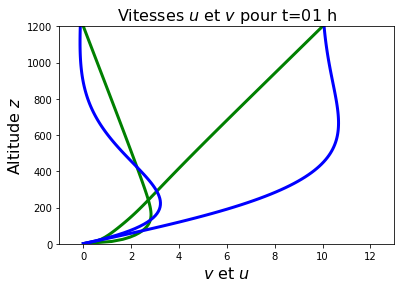

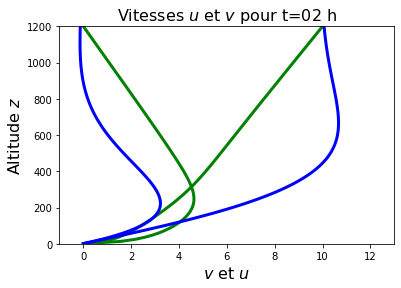

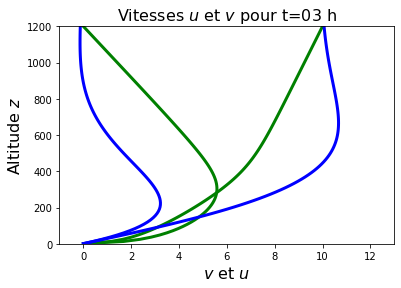

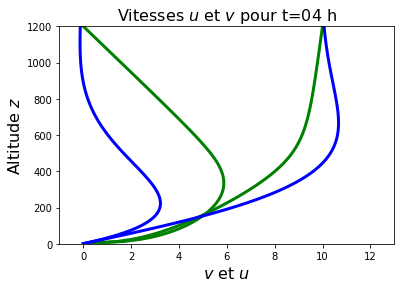

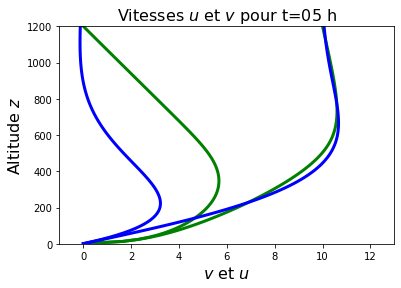

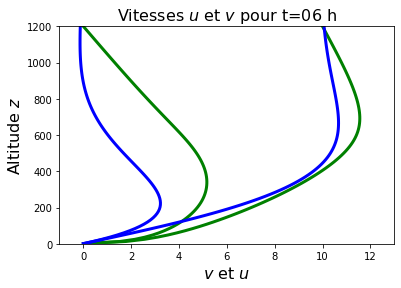

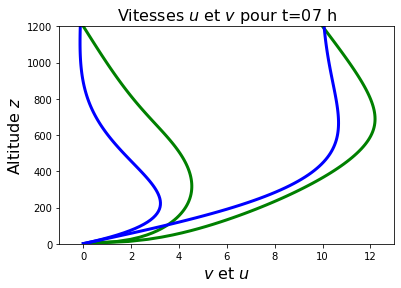

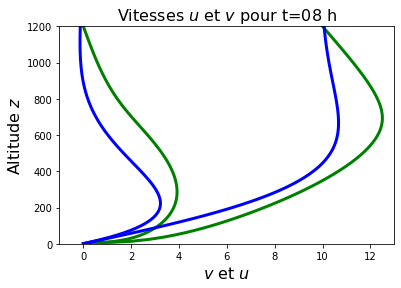

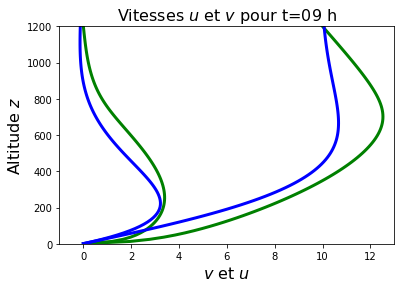

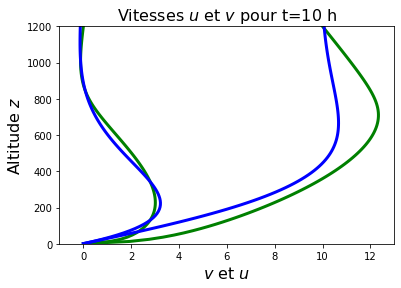

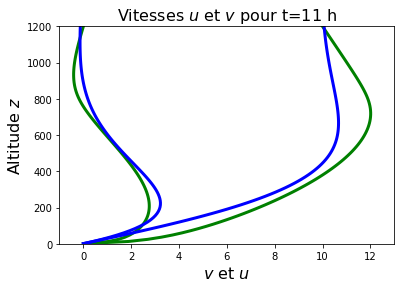

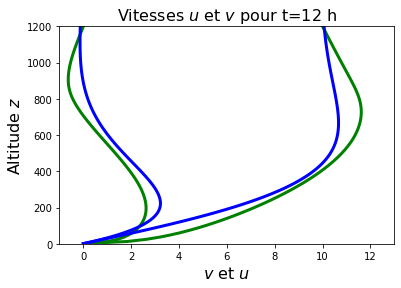

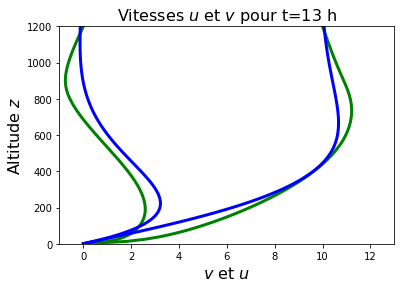

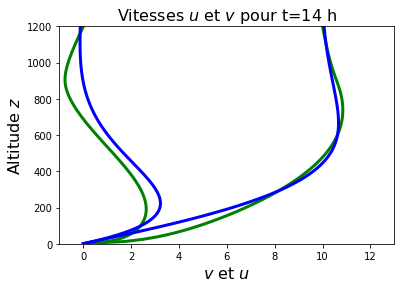

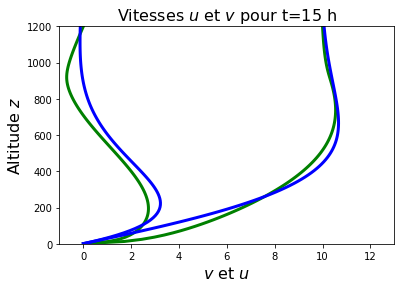

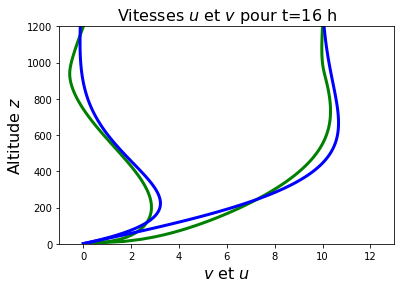

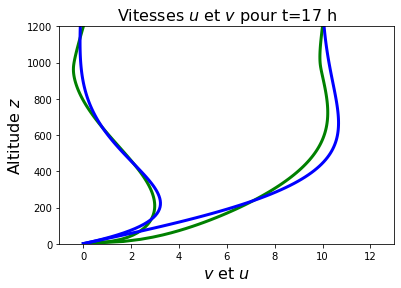

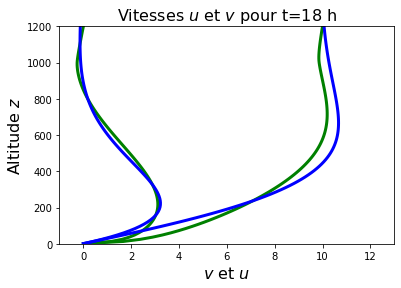

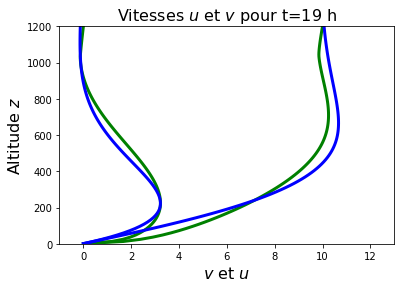

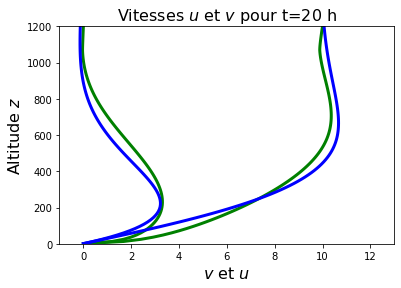

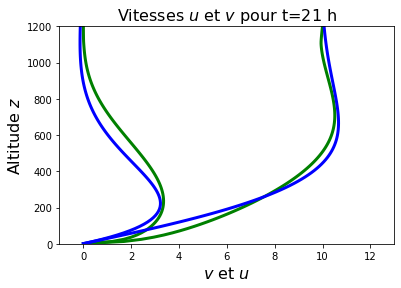

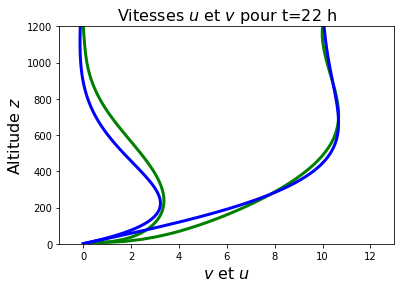

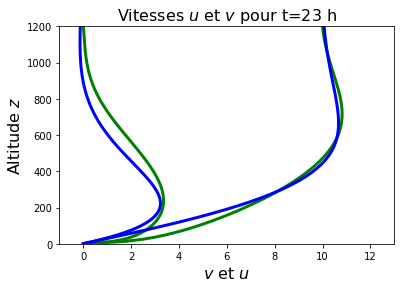

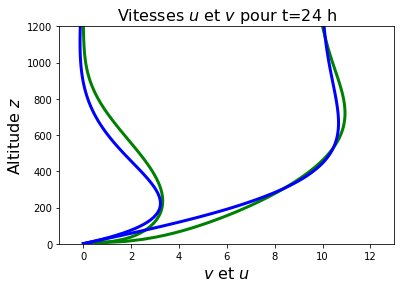

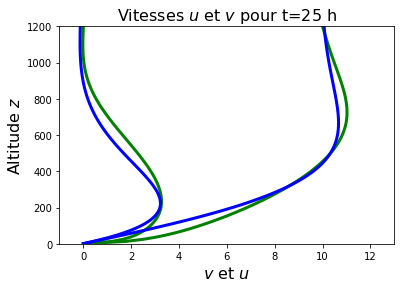

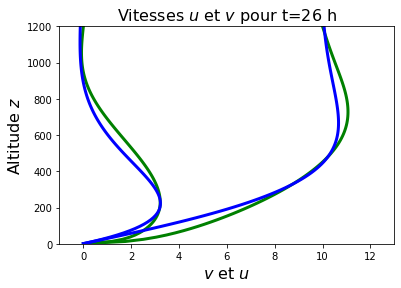

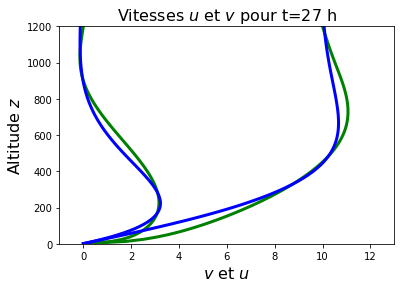

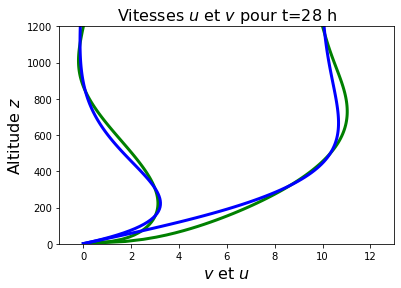

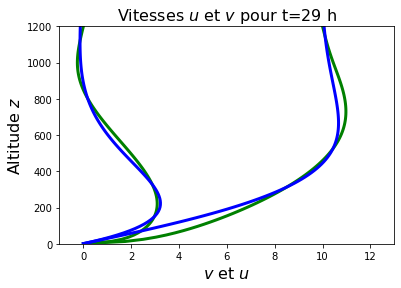

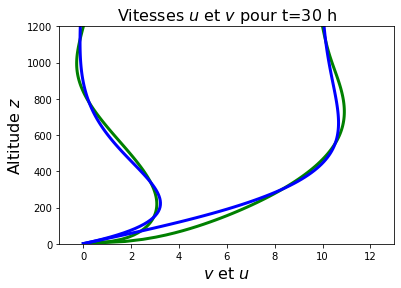

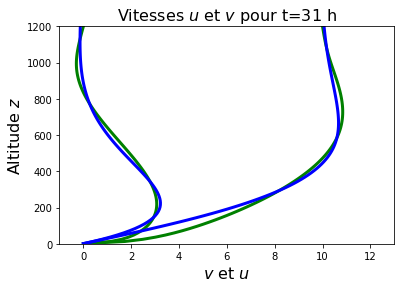

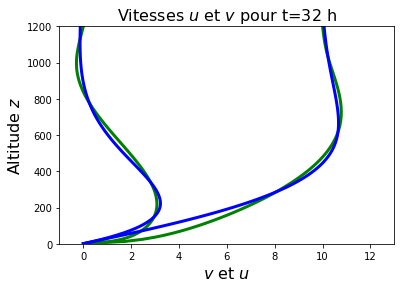

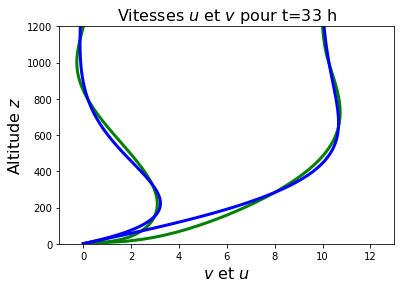

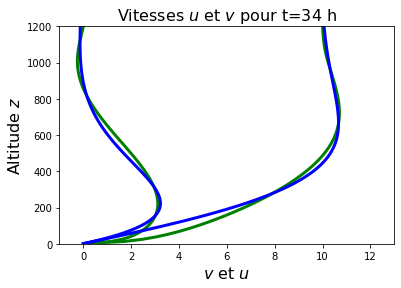

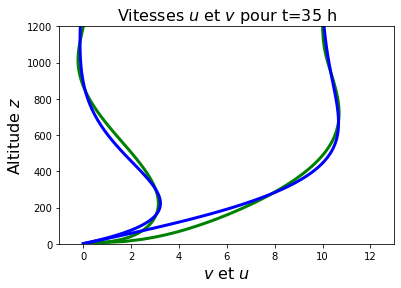

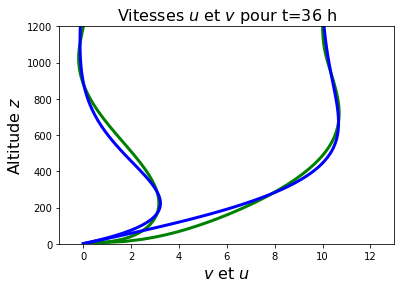

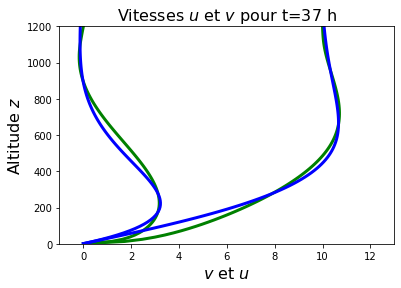

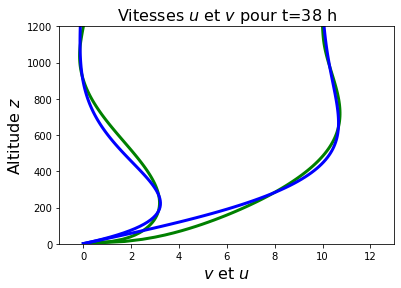

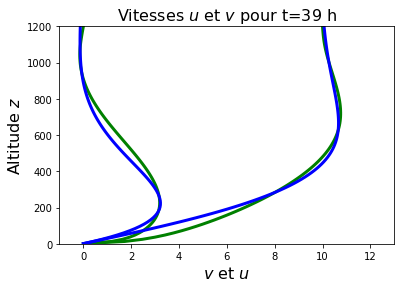

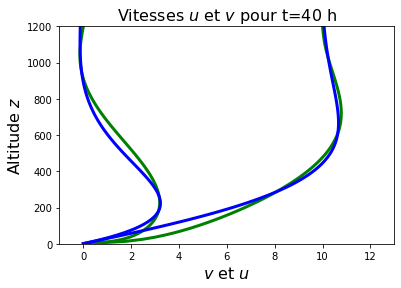

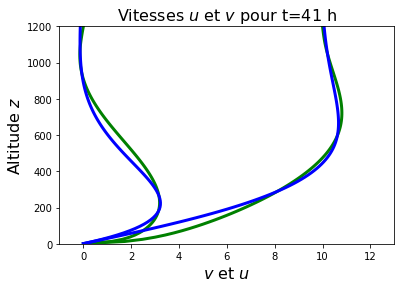

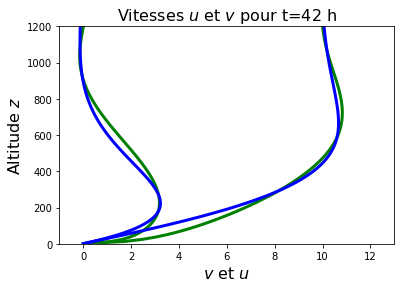

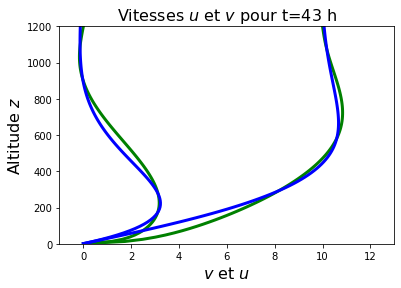

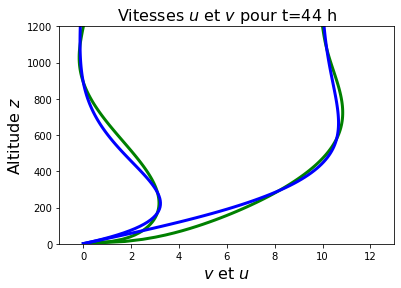

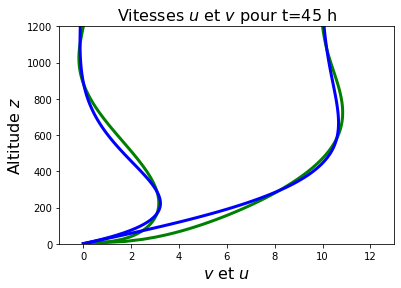

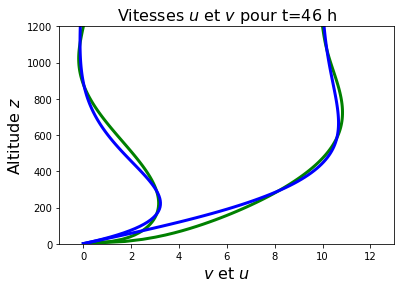

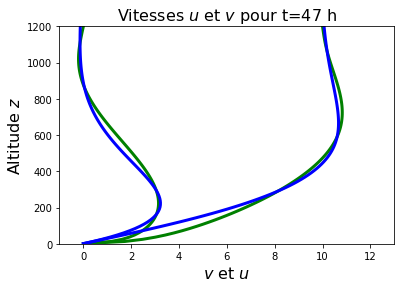

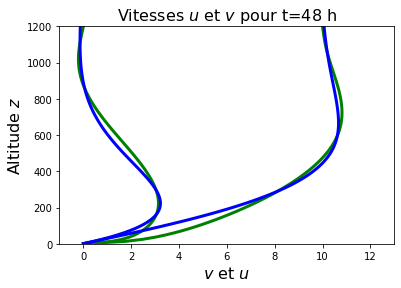

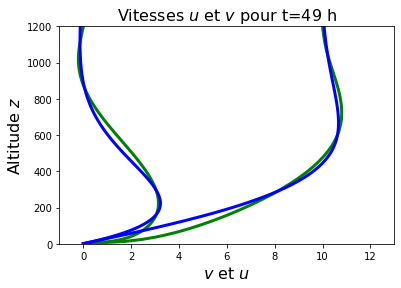

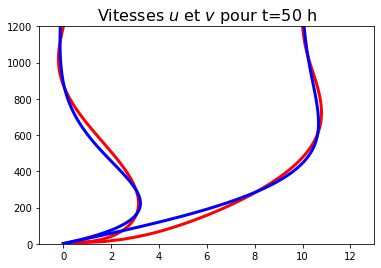

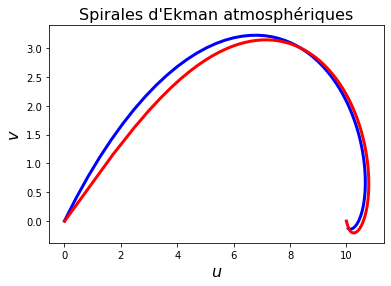

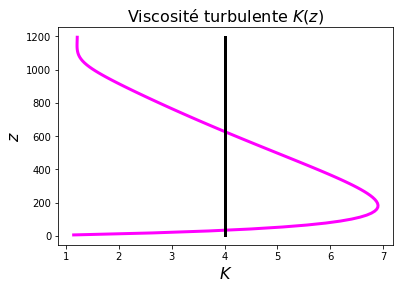

us= 0.40600028116617304


In [ ]:
k=0.41; f=1.e-4;  nu=1.e-6
ug=10; H=1200; z0=1; K0=4;
gam=np.sqrt(f/(2*K0)); 
xmin=-.1*ug; xmax=ug*1.3; 

# Space
Nhour=50
Nz=100; usdt=10; dt=1/usdt; Nt=Nhour*3600*usdt
z=np.linspace(z0,H,Nz+2); 
dz=(H-z0)/Nz; 
zh=.5*(z[1:]+z[:-1])

# Parametrization of l
# Journal of the Earth Simulator, Volume 6, October 2006, 3–15
la=2.7e-4*ug/f
l=la*k*zh/(la+k*zh)

F=False; T=True; ifilm=0; 
# Figure 
if T:
    plt.xlabel(r'$l$',fontsize=16 )
    plt.ylabel(r'$z$',fontsize=16) 
    plt.title(r"Longueur de mélange $l(z)$",fontsize=16)
    plt.plot(l,zh,linewidth=3,color='black')
    plt.show()

# Temporal
nplot=3600*usdt;

# laminar solution
ul=-ug*np.exp(-gam*(z-z0))*np.cos(gam*(z-z0))
vl=ug*np.exp(-gam*(z-z0))*np.sin(gam*(z-z0))

# initial condition
if T:
    u=ug*z/H-ug
    v=z*0
else :
    u=ul.copy()
    v=vl.copy()

# Loop
if T: 
    u,v,ifilm=advance(u,v)
    
    # final 
    t=round(Nt*dt/3600);
    plt.title("Vitesses $u$ et $v$ pour t="+zfi(t,2)+" h",fontsize=16)
       
    # avec longueur de melange
    plt.xlim(xmin,xmax)
    plt.ylim(0,H)          
    plt.plot(ug+u,z,linewidth=3,color='red')
    plt.plot(v,z,linewidth=3,color='red')
    
    # laminar
    plt.xlim(xmin,xmax)
    plt.ylim(0,H)          
    plt.plot(ug+ul,z,linewidth=3,color='blue')
    plt.plot(vl,z,linewidth=3,color='blue')
    plt.show()

# spiral
if T:
    #inifig(xlab='u',ylab='v')  
    plt.xlabel(r'$u$',fontsize=16 )
    plt.ylabel(r'$v$',fontsize=16) 
    plt.title("Spirales d'Ekman atmosphériques",fontsize=16)
    plt.plot(ug+ul,vl,linewidth=3,color='blue')
    plt.plot(ug+u,v,linewidth=3,color='red')
    plt.show()


# K
if T:
    plt.xlabel(r'$K$',fontsize=16 )
    plt.ylabel(r'$z$',fontsize=16) 
    plt.title(r"Viscosité turbulente $K(z)$",fontsize=16)
    dudz=(u[1:]-u[:-1])/dz
    dvdz=(v[1:]-v[:-1])/dz
    K=nu+l**2*np.sqrt(dudz**2+dvdz**2) 
    plt.plot(K,zh,linewidth=3,color='magenta')
    plt.plot(K0+0*K,zh,linewidth=3,color='black')
    plt.show()
    # u*
    us=np.sqrt(K[0]*(u[1]-u[0])/dz)
    print("us=",us)









